In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore")
import cufflinks as cf
cf.go_offline()
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
loan = pd.read_csv("hcg_data.csv")

In [4]:
loan.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_SELLER_INDUSTRY,NumberHits,ExpectedHits,SamplingWeight
0,0,Revolving loans,F,N,Y,1,90000.0,180000.0,9000.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity,1,0.001936,516.5364
1,0,Cash loans,F,Y,Y,0,180000.0,1035000.0,43983.0,1035000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,XNA,1,0.001936,516.5364
2,0,Cash loans,F,N,Y,0,360000.0,733315.5,41076.0,679500.0,...,0.0,0.0,0.0,0.0,0.0,3.0,XNA,1,0.001936,516.5364
3,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,900000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,XNA,1,0.001936,516.5364
4,0,Cash loans,F,Y,N,1,72000.0,90000.0,6529.5,90000.0,...,0.0,0.0,0.0,0.0,1.0,5.0,XNA,1,0.001936,516.5364


In [4]:
loan.shape

(5000, 35)

In [6]:
loan.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  5
NAME_TYPE_SUITE                 17
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OWN_CAR_AGE                   3385
OCCUPATION_TYPE               1481
CNT_FAM_MEMBERS                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
ORGANIZATION_TYPE                0
AMT_REQ_CREDIT_BUREAU_HOUR     645
AMT_REQ_CREDIT_BUREAU_DAY      645
AMT_REQ_CREDIT_BUREAU_WEEK     645
AMT_REQ_CREDIT_BUREA

In [12]:
# descriptibe statistics for numerical variables

loan.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NumberHits,ExpectedHits,SamplingWeight
count,5000.00000,5000.0000,5000.000000,5.000000e+03,5000.000000,4.995000e+03,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,5000.000000,5000.000000,5000.000000
mean,0.50000,0.4174,171785.576187,5.766549e+05,27058.258800,5.131462e+05,-15907.395000,59574.879600,-4819.957800,-2909.927200,...,11.877200,0.005052,0.008496,0.038347,0.296441,0.350172,2.921010,1.010800,0.011184,282.740200
std,0.50005,0.7195,86867.609614,3.653419e+05,13305.499971,3.347932e+05,4311.543316,137480.703685,3525.359498,1493.518012,...,3.281383,0.077110,0.101307,0.200250,0.991268,0.749060,2.198615,0.103371,0.009249,233.819583
min,0.00000,0.0000,27000.000000,4.500000e+04,2295.000000,4.500000e+04,-25142.000000,-15476.000000,-17781.000000,-6125.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001936,48.944000
25%,0.00000,0.0000,112500.000000,2.844000e+05,17289.000000,2.385000e+05,-19523.750000,-2643.000000,-7254.250000,-4210.750000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001936,48.944000
50%,0.50000,0.0000,157500.000000,5.084955e+05,25276.500000,4.500000e+05,-15568.000000,-1194.000000,-4330.000000,-3097.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.011184,282.740200
75%,1.00000,1.0000,202500.000000,7.650000e+05,34102.125000,6.750000e+05,-12244.000000,-355.500000,-1802.000000,-1687.750000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.020432,516.536400
max,1.00000,6.0000,990000.000000,2.961000e+06,109323.000000,2.961000e+06,-7742.000000,365243.000000,-1.000000,-4.000000,...,23.000000,2.000000,2.000000,3.000000,22.000000,6.000000,14.000000,2.000000,0.020432,516.536400


In [56]:
# check percentage of missing values
missing = loan.isnull().sum()/len(loan)*100
missing

TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.10
NAME_TYPE_SUITE                0.34
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                 16.82
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   67.70
OCCUPATION_TYPE               29.62
CNT_FAM_MEMBERS                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
ORGANIZATION_TYPE              0.00
AMT_REQ_CREDIT_BUREAU_HOUR    12.90
AMT_REQ_CREDIT_BUREAU_DAY     12.90
AMT_REQ_CREDIT_BUREAU_WEEK  

In [4]:
# we will drop the OWN_CAR_AGE variable because it's missing a lot of data(67%)
# the other variables have an acceptable amount of missing values, we will deal with these later

loan = loan.drop('OWN_CAR_AGE',axis=1)

In [17]:
# check duplicates in data
loan.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

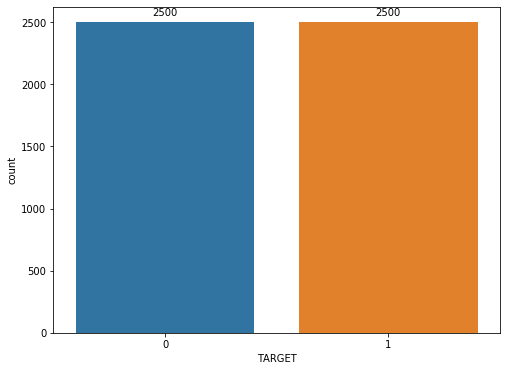

In [14]:
# check how many customers were able to pay the loand and how many were unable
#  the distribution of data points among output class
plt.figure(figsize=(8,6))
plot = sns.countplot(x='TARGET',data=loan)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [15]:
# there's equal number of customers that are able or unable to pay back the loan

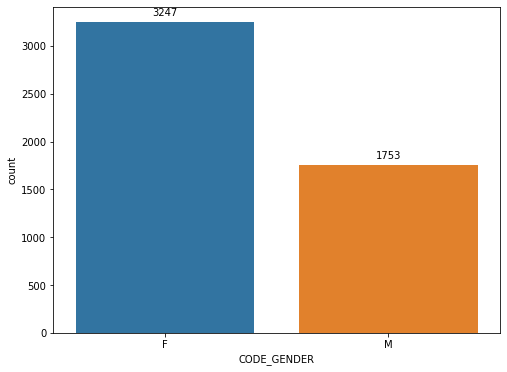

In [19]:
# Count how many Males and Females took the loan
plt.figure(figsize=(8,6))
plot = sns.countplot(x='CODE_GENDER',data=loan)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [20]:
# Most of the clients who took the loan are Females

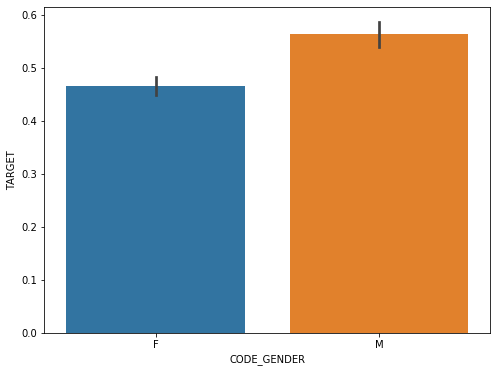

In [18]:
# check payment difficulties by gender
plt.figure(figsize=(8,6))
sns.barplot(x='CODE_GENDER',y='TARGET',data=loan)

In [21]:
# Males are most likely to have payment difficulties 

In [3]:
# let's look at types of loans customer prefer taking
contract_val = loan['NAME_CONTRACT_TYPE'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,'values': contract_val.values})

contract_df.iplot(kind='pie',labels='labels',values='values', title='Types of Loan', hole = 0.6)

In [29]:
# Most customers prefer taking Cash Loans than Revolving Loans

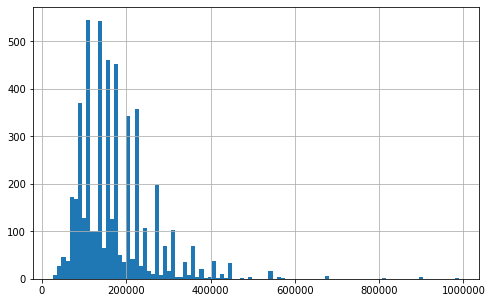

In [54]:
# let's now look at distribution of customers income
loan['AMT_INCOME_TOTAL'].hist(bins=100,figsize=(8,5));

In [36]:
# the data is skewed to the right and there some exreme values/outliers
# most customers are earning below the average

In [45]:
# look at customer earning more than 500k
(loan[loan['AMT_INCOME_TOTAL'] > 500000]['TARGET'].value_counts())/len(loan[loan['AMT_INCOME_TOTAL'] > 500000])*100

0    53.125
1    46.875
Name: TARGET, dtype: float64

In [40]:
# customers earning more than 500 000 are most likely to repay the loan

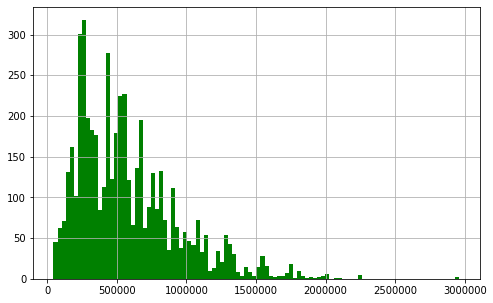

In [60]:
# let's look at amount of credit that customer take

loan['AMT_CREDIT'].hist(bins=100,figsize=(8,5),color='green');

In [57]:
# check amount of credit by loan repayment - check repayments of large credit amounts

(loan[loan['AMT_CREDIT'] > 1000000]['TARGET'].value_counts())/len(loan[loan['AMT_CREDIT'] > 1000000])*100

0    56.666667
1    43.333333
Name: TARGET, dtype: float64

In [58]:
# customers who are taking credit for large amount are very likely to repay the loan

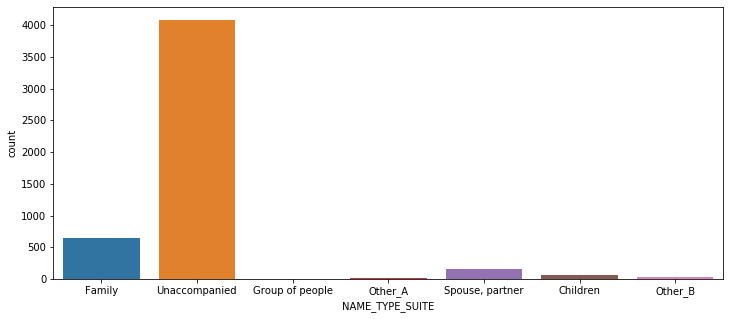

In [64]:
# who was accompanying the client when he was applying for the loan?

plt.figure(figsize=(12,5))
sns.countplot(x='NAME_TYPE_SUITE',data=loan);

In [65]:
# most customers were unaccompanied when they were applying for a loan
# as a spike can be seen on "Unaccompanied" Name type suite

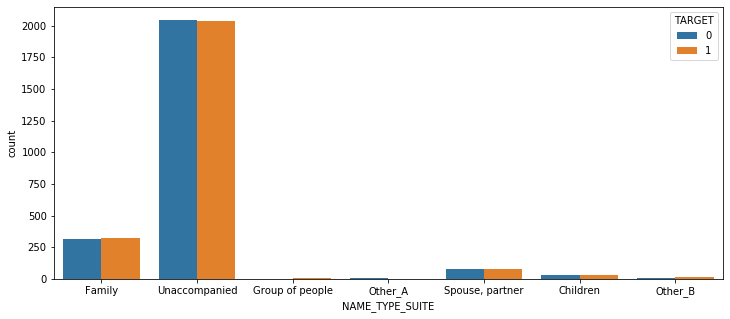

In [69]:
# Distribution of Name type Suite in terms of wheteher loan is repayed or not

plt.figure(figsize=(12,5))
sns.countplot(x='NAME_TYPE_SUITE',hue='TARGET',data=loan)

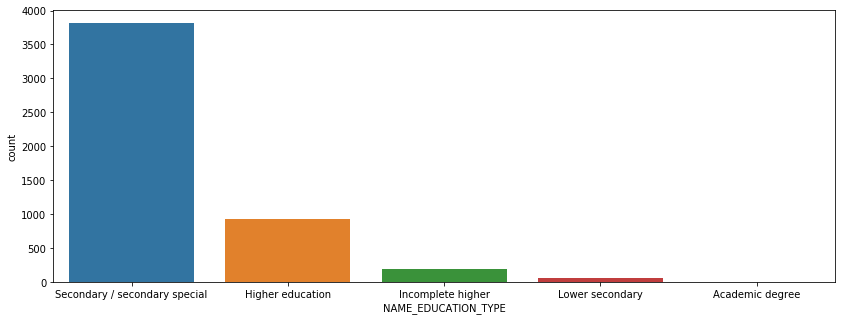

In [73]:
# customers highest level of education

plt.figure(figsize=(14,5))
sns.countplot(x='NAME_EDUCATION_TYPE',data=loan);

In [ ]:
# Most customers have Secondary school education

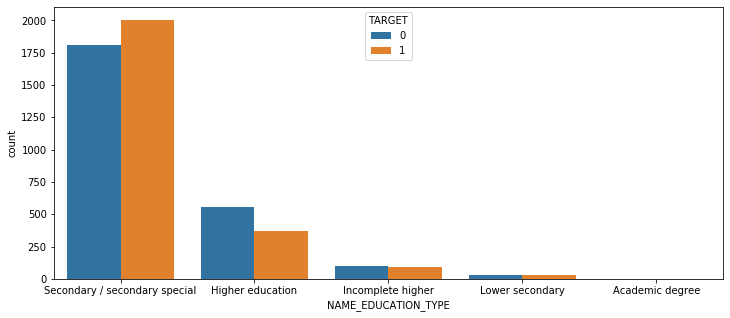

In [74]:
# Distribution of Education of Applicants in terms of loan is repayed or not.

plt.figure(figsize=(12,5))
sns.countplot(x='NAME_EDUCATION_TYPE',hue='TARGET',data=loan)

In [75]:
# Most Customers with higher education repay the loan

In [5]:
education_val = loan['NAME_EDUCATION_TYPE'].value_counts()
education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(loan['TARGET'][loan['NAME_EDUCATION_TYPE']==val] == 1))
    education_val_y0.append(np.sum(loan['TARGET'][loan['NAME_EDUCATION_TYPE']==val] == 0))
data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Yes' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Education sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Education of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_dark'
py.iplot(fig)

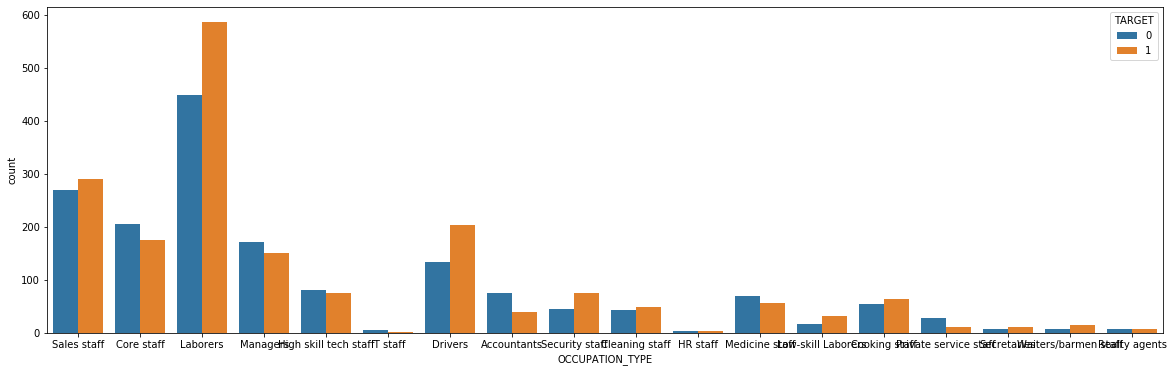

In [13]:
# check customer's income sources by whether they can repay the loan or not
plt.figure(figsize=(20,6))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=loan);

In [14]:
# Laborers, Drivers, Sales Stuff and Security guards are most likely to have payment difficulties

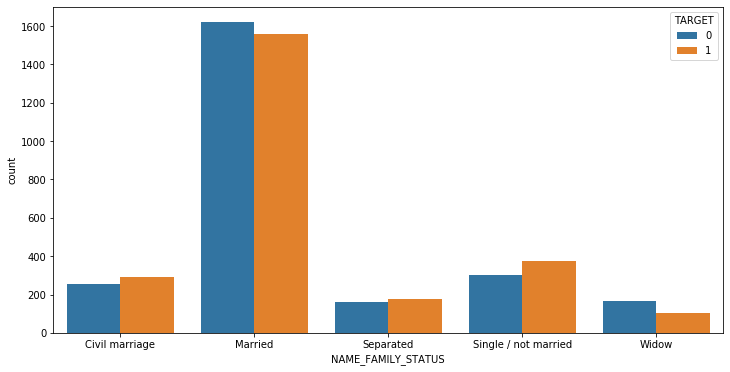

In [16]:
# check customer's status by whether they can repay the loan or not
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_FAMILY_STATUS',hue='TARGET',data=loan);

In [17]:
# Customers who are single and those on civil marriage have payment difficulties
# widows are more likely to repay the loan

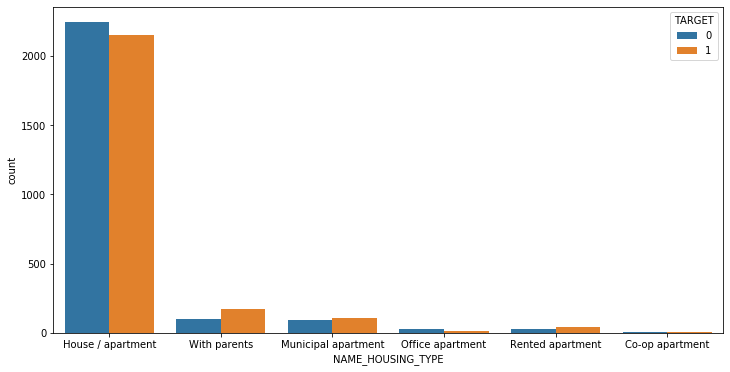

In [18]:
# check customer's housing type by whether they can repay the loan or not
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_HOUSING_TYPE',hue='TARGET',data=loan);

In [19]:
# customers staying with parents have payment difficulties
# same applies to customers renting an apartment and those on municipal apartment
# customers on owning a house/apartment and those on office apartments will repay the loan

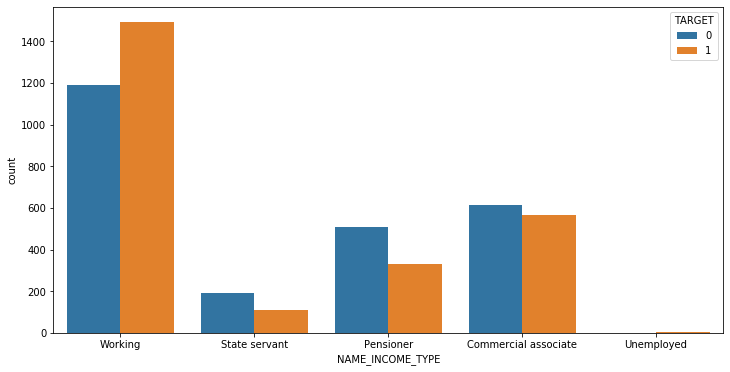

In [59]:
# check customer's icnome type by whether they can repay the loan or not
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_INCOME_TYPE',hue='TARGET',data=loan);

In [60]:
# Commercial associate, State servants and Pensioners are most likely to repay the loan

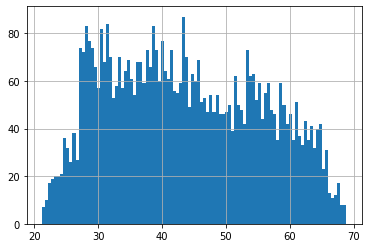

In [23]:
# Distribution of Client's Age
(loan['DAYS_BIRTH']/(-365)).hist(bins=100)

In [25]:
(loan['DAYS_BIRTH']/(-365)).iplot(kind='histogram',bins=50)

In [24]:
# descriptive stats of age
# we divide Age by -365 because the Age data is recorded in negative days
(loan['DAYS_BIRTH']/(-365)).describe()

count    5000.000000
mean       43.581904
std        11.812447
min        21.210959
25%        33.545205
50%        42.652055
75%        53.489726
max        68.882192
Name: DAYS_BIRTH, dtype: float64

In [32]:
# create age categories

age=(loan['DAYS_BIRTH']/(-365)).values
category=[]
for i in age:
    if i>=21 and i<=30:
        category.append("21-30")
    elif i>=31 and i<=40:
        category.append("31-40")
    elif i>=41 and i<=50:
        category.append("41-50")
    elif i>=51 and i<=60:
        category.append("51-60")
    else:
        category.append("Above 60")

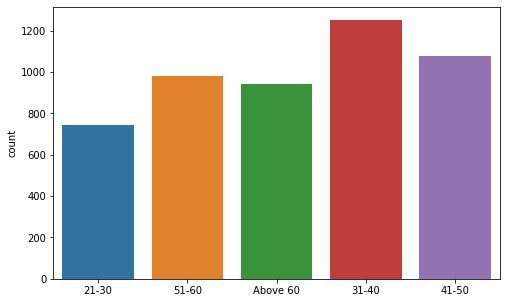

In [33]:
# now check how many customers are in each age category
plt.figure(figsize=(8,5))
sns.countplot(category)

In [28]:
# most of the customers were between 31 to 40 at the time they applied for the loan

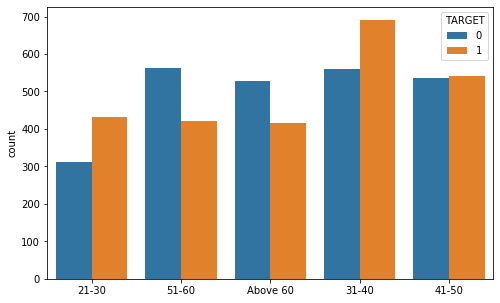

In [34]:
# now let's check if age has an effect on customer's payment difficulties
plt.figure(figsize=(8,5))
sns.countplot(category,hue='TARGET',data=loan)

In [31]:
# Young people (21 to 30 years) and people between 31 to 40 years of age will most likely have loan repayment difficuties
# Customers above 50 years are most likely to repay the loan 
# This doesn't mean that the Home credit group should not give loans to young people
# but rather educate and give them guidance so they can be able to repay the loan better

In [38]:
# check days of employment before customers applied for loan
loan['DAYS_EMPLOYED'].iplot(kind='histogram')

In [39]:
# There are customers with -1000.66 years(-365243) days of employment which is impossible
# looks like there is data entry error.

In [40]:
# Create an error flag column
loan['DAYS_EMPLOYED_ERROR'] = loan["DAYS_EMPLOYED"] == 365243

# Replace the error values with nan
loan['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [41]:
# Created a seperate column ‘DAYS_EMPLOYED_ERROR’, which flags the error.

(loan['DAYS_EMPLOYED']/(-365)).iplot(kind='histogram')

In [42]:
# now check which customers are more/less liekely to pay the loan depending on their days of employemnt

loan[loan['DAYS_EMPLOYED']>(-365*2)]['TARGET'].value_counts()/sum(loan['DAYS_EMPLOYED']>(-365*2))

1    0.595117
0    0.404883
Name: TARGET, dtype: float64

In [46]:
# create days/years of employement category

days=(loan['DAYS_EMPLOYED']/(-365)).values
category=[]
for i in days:
    if i>=0 and i<5:
        category.append("0-5")
    elif i>=5 and i<10:
        category.append("5-10")
    elif i>=10 and i<15:
        category.append("10-15")
    elif i>=15 and i<=20:
        category.append("15-20")
    else:
        category.append("Above 20")

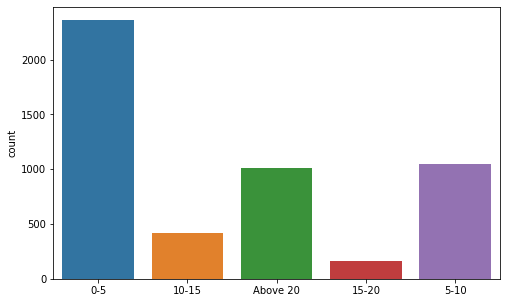

In [47]:
# check how many customers are in each category years of employment
plt.figure(figsize=(8,5))
sns.countplot(category)

In [51]:
# Most of the customers have less than 5 years at their current employment

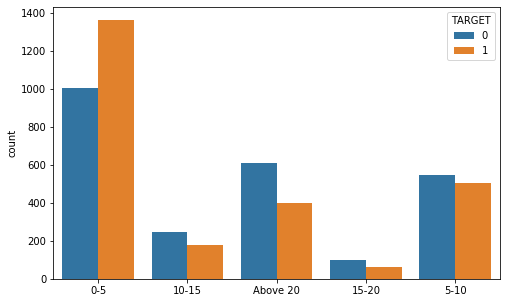

In [48]:
# customers years of employement by payment difficulties
plt.figure(figsize=(8,5))
sns.countplot(category,hue='TARGET',data=loan)

In [50]:
# Customers with less than 5 years at current employment are less likely to repay the loan
# Customers with 6 to 20 years at current employemnt are more liekly to repay the loan

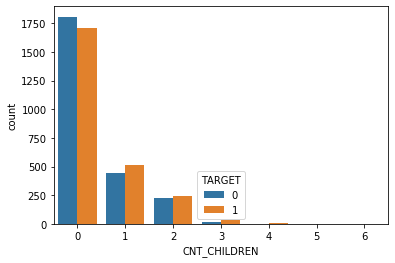

In [68]:
sns.countplot(x='CNT_CHILDREN',hue='TARGET',data=loan);

In [69]:
# Customers with more than 1 have payment difficulties

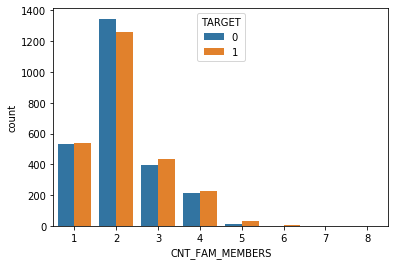

In [105]:
sns.countplot(x='CNT_FAM_MEMBERS',hue='TARGET',data=loan);

In [106]:
# Customers with more than 3 family members are less likely to pay the loan as compared to those with fewer FAM members

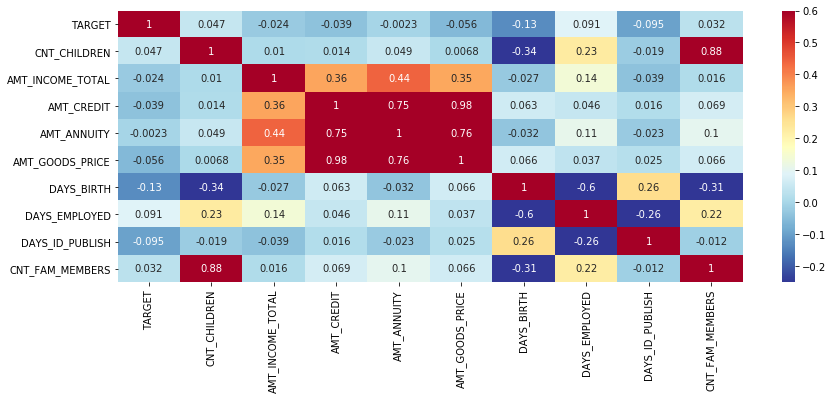

In [111]:
# check the correlation amongst variables
plt.figure(figsize=(14,5))
sns.heatmap(loan.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6);

In [113]:
# AMT_GOODS AND AMT_CREDIT are very strogly correlated
# Also CNT_CHILDREN AND CNT_FAM_MEMBERS are very strongly correlated
# we will drop one of these variables in each pair 
# so that this high correlation doesn't cause noise or affect our model's accuracy

In [54]:
#---------------------------DATA PREPROCESSING-------------------

In [6]:
# First drop the variables we won't need 
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_HOUR',axis=1)
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_DAY',axis=1)
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_WEEK',axis=1)
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_MON',axis=1)
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_QRT',axis=1)
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_YEAR',axis=1)
loan = loan.drop('NAME_SELLER_INDUSTRY',axis=1)
loan = loan.drop('NumberHits',axis=1)
loan = loan.drop('ExpectedHits',axis=1)
loan = loan.drop('SamplingWeight',axis=1)
loan = loan.drop('ORGANIZATION_TYPE',axis=1)
loan = loan.drop('HOUR_APPR_PROCESS_START',axis=1)
loan = loan.drop('DAYS_REGISTRATION',axis=1)
loan = loan.drop('FLAG_OWN_CAR',axis=1)
loan = loan.drop('FLAG_OWN_REALTY',axis=1)

In [7]:
loan = loan.drop('WEEKDAY_APPR_PROCESS_START',axis=1)

In [8]:
# drop one of the hihly correlated variables in each pair
loan = loan.drop('AMT_GOODS_PRICE',axis=1)
loan = loan.drop('CNT_CHILDREN',axis=1)

In [115]:
loan.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,Revolving loans,F,90000.0,180000.0,9000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,21.846575,2.452055,1.758904,Sales staff,3
1,0,Cash loans,F,180000.0,1035000.0,43983.0,Unaccompanied,State servant,Higher education,Married,House / apartment,53.561644,13.304110,8.449315,Core staff,2
2,0,Cash loans,F,360000.0,733315.5,41076.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,63.101370,-1000.665753,2.172603,NaN,1
3,0,Cash loans,F,243000.0,900000.0,32017.5,Unaccompanied,Working,Higher education,Married,House / apartment,40.413699,18.457534,13.117808,Core staff,2
4,0,Cash loans,F,72000.0,90000.0,6529.5,Unaccompanied,Working,Secondary / secondary special,Married,With parents,30.846575,0.449315,10.824658,Laborers,3


In [9]:
# convert days birth and days employed to years
loan['DAYS_BIRTH']=(loan['DAYS_BIRTH']/(-365))
loan['DAYS_EMPLOYED']=(loan['DAYS_EMPLOYED']/(-365))
loan['DAYS_ID_PUBLISH']=(loan['DAYS_ID_PUBLISH']/(-365))

In [10]:
loan.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,Revolving loans,F,90000.0,180000.0,9000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,21.846575,2.452055,1.758904,Sales staff,3
1,0,Cash loans,F,180000.0,1035000.0,43983.0,Unaccompanied,State servant,Higher education,Married,House / apartment,53.561644,13.304110,8.449315,Core staff,2
2,0,Cash loans,F,360000.0,733315.5,41076.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,63.101370,-1000.665753,2.172603,NaN,1
3,0,Cash loans,F,243000.0,900000.0,32017.5,Unaccompanied,Working,Higher education,Married,House / apartment,40.413699,18.457534,13.117808,Core staff,2
4,0,Cash loans,F,72000.0,90000.0,6529.5,Unaccompanied,Working,Secondary / secondary special,Married,With parents,30.846575,0.449315,10.824658,Laborers,3


In [11]:
# Now remove negative years employed
loan = loan[~(loan['DAYS_EMPLOYED'] < 0)] 

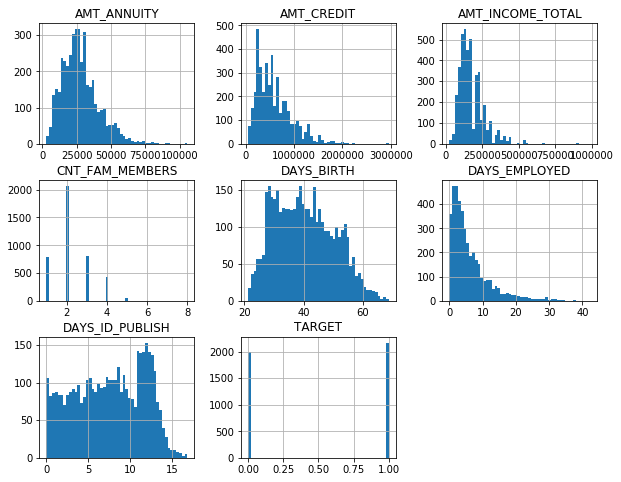

In [129]:
# check distribution of each vaiables
loan.hist(bins=50,figsize=(10,8));

In [130]:
# skewness
loan.skew()

TARGET             -0.083295
AMT_INCOME_TOTAL    1.942194
AMT_CREDIT          1.240678
AMT_ANNUITY         0.979716
DAYS_BIRTH          0.282910
DAYS_EMPLOYED       1.960345
DAYS_ID_PUBLISH    -0.125634
CNT_FAM_MEMBERS     0.772440
dtype: float64

In [12]:
# Fill in missing values
loan['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace = True)
loan['OCCUPATION_TYPE'].fillna('Laborers',inplace = True)

In [13]:
loan.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,Revolving loans,F,90000.0,180000.0,9000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,21.846575,2.452055,1.758904,Sales staff,3
1,0,Cash loans,F,180000.0,1035000.0,43983.0,Unaccompanied,State servant,Higher education,Married,House / apartment,53.561644,13.304110,8.449315,Core staff,2
3,0,Cash loans,F,243000.0,900000.0,32017.5,Unaccompanied,Working,Higher education,Married,House / apartment,40.413699,18.457534,13.117808,Core staff,2
4,0,Cash loans,F,72000.0,90000.0,6529.5,Unaccompanied,Working,Secondary / secondary special,Married,With parents,30.846575,0.449315,10.824658,Laborers,3
5,0,Revolving loans,M,166500.0,495000.0,24750.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,59.000000,7.747945,12.802740,Laborers,2


In [14]:
# encode categorical variables
le = LabelEncoder()
loan['NAME_CONTRACT_TYPE']=le.fit_transform(loan['NAME_CONTRACT_TYPE'])
loan['CODE_GENDER']=le.fit_transform(loan['CODE_GENDER'])
loan['NAME_TYPE_SUITE']=le.fit_transform(loan['NAME_TYPE_SUITE'])
loan['NAME_INCOME_TYPE']=le.fit_transform(loan['NAME_INCOME_TYPE'])
loan['NAME_EDUCATION_TYPE']=le.fit_transform(loan['NAME_EDUCATION_TYPE'])
loan['NAME_FAMILY_STATUS']=le.fit_transform(loan['NAME_FAMILY_STATUS'])
loan['NAME_HOUSING_TYPE']=le.fit_transform(loan['NAME_HOUSING_TYPE'])
loan['OCCUPATION_TYPE']=le.fit_transform(loan['OCCUPATION_TYPE'])

In [15]:
loan.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,1,0,90000.0,180000.0,9000.0,1,2,4,0,1,21.846575,2.452055,1.758904,14,3
1,0,0,0,180000.0,1035000.0,43983.0,6,1,1,1,1,53.561644,13.304110,8.449315,3,2
3,0,0,0,243000.0,900000.0,32017.5,6,2,1,1,1,40.413699,18.457534,13.117808,3,2
4,0,0,0,72000.0,90000.0,6529.5,6,2,4,1,5,30.846575,0.449315,10.824658,8,3
5,0,1,1,166500.0,495000.0,24750.0,6,0,4,1,1,59.000000,7.747945,12.802740,8,2


In [16]:
# Now the Data is clean and ready for machine learning models

In [17]:
#-------------------------MACHINE LEARNING-------------


#Classification Algorithms 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, precision_score, plot_confusion_matrix,classification_report

In [18]:
# Before fitting a model, first take independent(y) and dependent variables(X)

X = loan.drop('TARGET',axis=1)
y = loan['TARGET']

In [19]:
# Split the data to train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=10)

In [20]:
# Random Forest 

rf = RandomForestClassifier(n_estimators=200,max_depth=10,criterion='gini',class_weight='balanced',random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

64.0625

In [22]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100

62.86057692307693

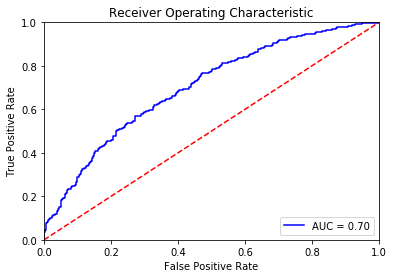

In [203]:
#ROC CURVE FOR THE MODELS
probs = rf.predict_proba(X_test)  #for random forest
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1]:
# The model, Random Forest, achived the highest accuaracy score of 64% and AUC of 70%
# It's not bad but it can be improved by tuning some parameters and fitting it again with the most important features only

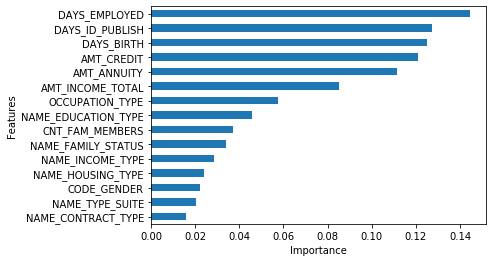

In [208]:
#Feature importance of the selected model (random forest)
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(17).plot(kind='barh')
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [2]:
#These are the most important features identified by the selected model in predicting loan payment difficulties

In [205]:
y_pred = rf.predict(X_test)

Precision Score: 63.374486


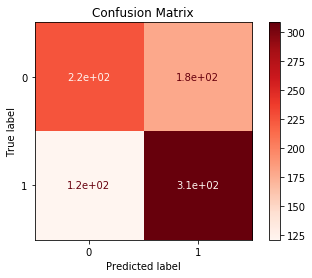

In [206]:
# Profit matrix
print("Precision Score: %f" % (precision_score(y_test, y_pred) * 100))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [207]:
#RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.5994789404140899


In [4]:
# An RMSE is an error that measures the deviation of the predicted values from the actual values
# It is always in the same range or units with the target variable
# So in this case our RMSE will be between 0 and 1 since our dependant variable is 0 and 1
# So we want an RMSE as low as possible
# 0.5 is not too bad but we can always reduce this to 0.3 or less.
# Because we want a model that reduces misclassification as much as possible
# since we want to classify customser who cannot repay the loan as accurate as possible